In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [361]:
scraped_data = pd.read_csv('fab_scraped_data.csv')

scraped_data.rename(columns={'rarity':'rarity', 'product':'name'}, inplace = True)
scraped_data.head(15)


,name,rarity,number,market price,listed median
0,Alluring Inducement,Majestic,DTD215,$0.80,—
1,Angelic Descent (Blue),Common,DTD034,$0.12,—
2,Angelic Descent (Red),Common,DTD032,$0.11,—
3,Angelic Descent (Yellow),Common,DTD033,$0.17,—
4,Angelic Wrath (Blue),Common,DTD037,$0.10,—
5,Angelic Wrath (Red),Common,DTD035,$0.10,—
6,Angelic Wrath (Yellow),Common,DTD036,$0.14,—
7,Anthem of Spring,Majestic,DTD196,$0.52,—
8,Banneret of Courage,Majestic,DTD048,$2.08,—
9,Banneret of Gallantry,Majestic,DTD049,$2.10,—


In [362]:
api_data = pd.read_csv('API_data.csv')
api_data.rename(columns={'rarity':'rarity', 'name':'name', 'number':'set_number', 'sku':'number'}, inplace = True)
api_data['number'] = api_data['number'].str.extract(r'(?:U-)?([A-Z0-9]+)')
api_data.head(10)

,identifier,name,legality,keywords,text,rarity,image,pitch value,life,intellect,...,finish,edition,number,set_number,set.id,set.name,set.released,set.browseable,set.draftable,set.0
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,Cold foil,{},ARC000,0,arc,Arcane Rising,2020-03-27,True,True,NaN
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,Rainbow foil,{},ARC000,0,arc,Arcane Rising,2020-03-27,True,True,NaN
2,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},ARC001,1,arc,Arcane Rising,2020-03-27,True,True,NaN
3,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},ARC001,1,arc,Arcane Rising,2020-03-27,True,True,NaN
4,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},CRU098,98,cru,Crucible of War,2020-08-28,True,NaN,NaN
5,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Cold Foil,{},HER009,9,her,Hero Promos,NaN,NaN,NaN,browseable => false
6,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Rainbow Foil,{},HER017,17,her,Hero Promos,NaN,NaN,NaN,browseable => false
7,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},CRU098,98,cru,Crucible of War,2020-08-28,True,NaN,NaN
8,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,Regular,{},1HP180,180,1hp,History Pack 1,2021-05-07,False,NaN,NaN
9,dash,Dash,[],"['mechanologist', 'hero', 'young']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,20.0,4.0,...,Regular,{},ARC002,2,arc,Arcane Rising,2020-03-27,True,True,NaN


In [363]:
# Perform the join based on the remaining 'rarity' colum   
#merged_data = api_data.merge(scraped_data, on='rarity', how='left')
merged_data = pd.merge(api_data, scraped_data, on=['number'], how='left')
merged_data.head(10)

,identifier,name_x,legality,keywords,text,rarity_x,image,pitch value,life,intellect,...,set.id,set.name,set.released,set.browseable,set.draftable,set.0,name_y,rarity_y,market price,listed median
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—
2,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
3,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
4,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,cru,Crucible of War,2020-08-28,True,NaN,NaN,"Dash, Inventor Extraordinaire",Common,$0.65,—
5,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,her,Hero Promos,NaN,NaN,NaN,browseable => false,"Dash, Inventor Extraordinaire",Promo,—,—
6,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,her,Hero Promos,NaN,NaN,NaN,browseable => false,"Dash, Inventor Extraordinaire (Rainbow)",Promo,$192.32,—
7,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,cru,Crucible of War,2020-08-28,True,NaN,NaN,"Dash, Inventor Extraordinaire",Common,$0.65,—
8,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,1hp,History Pack 1,2021-05-07,False,NaN,NaN,"Dash, Inventor Extraordinaire",Common,$0.56,—
9,dash,Dash,[],"['mechanologist', 'hero', 'young']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,20.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN


In [364]:
merged_data.head(2)

,identifier,name_x,legality,keywords,text,rarity_x,image,pitch value,life,intellect,...,set.id,set.name,set.released,set.browseable,set.draftable,set.0,name_y,rarity_y,market price,listed median
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,$208.95,—


In [365]:
# List of columns to clean (remove "$" sign and convert to numeric data type)
columns_to_clean = ['market price', 'listed median']

# Loop through each column in the list and apply the transformations
for column in columns_to_clean:
    merged_data[column] = merged_data[column].str.replace('$', '', regex=True)  # Remove "$" sign
    merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce')  # Convert to numeric data type

# Print the DataFrame to verify the change

merged_data

,identifier,name_x,legality,keywords,text,rarity_x,image,pitch value,life,intellect,...,set.id,set.name,set.released,set.browseable,set.draftable,set.0,name_y,rarity_y,market price,listed median
0,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,208.95,NaN
1,eye-of-ophidia,Eye of Ophidia,[],"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,Fabled,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,...,arc,Arcane Rising,2020-03-27,True,True,NaN,Eye of Ophidia,Fabled,208.95,NaN
2,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
3,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,arc,Arcane Rising,2020-03-27,True,True,NaN,NaN,NaN,NaN,NaN
4,dash-inventor-extraordinaire,"Dash, Inventor Extraordinaire",[],"['mechanologist', 'hero']",You may start the game with a Mechanologist it...,T,https://fabdb2.imgix.net/cards/printings/ARC00...,NaN,40.0,4.0,...,cru,Crucible of War,2020-08-28,True,NaN,NaN,"Dash, Inventor Extraordinaire",Common,0.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,phoenix-form,Phoenix Form,[],"['draconic', 'ninja', 'action', 'attack']","If you control 1 or more Phoenix Flames, Phoen...",Majestic,https://fabdb2.imgix.net/cards/printings/UPR04...,1.0,NaN,NaN,...,upr,Uprising,2022-06-28,True,True,NaN,Phoenix Form (Extended Art),Majestic,8.30,NaN
6771,spreading-flames,Spreading Flames,[],"['draconic', 'ninja', 'action', 'attack']",Draconic attacks you control have +1 [attack] ...,Majestic,https://fabdb2.imgix.net/cards/printings/UPR04...,1.0,NaN,NaN,...,upr,Uprising,2022-06-28,True,True,NaN,Spreading Flames,Majestic,0.97,NaN
6772,spreading-flames,Spreading Flames,[],"['draconic', 'ninja', 'action', 'attack']",Draconic attacks you control have +1 [attack] ...,Majestic,https://fabdb2.imgix.net/cards/printings/UPR04...,1.0,NaN,NaN,...,upr,Uprising,2022-06-28,True,True,NaN,Spreading Flames,Majestic,0.97,NaN
6773,combustion-point,Combustion Point,[],"['draconic', 'ninja', 'attack', 'reaction']",Target Draconic or Ninja attack action card ga...,Majestic,https://fabdb2.imgix.net/cards/printings/UPR05...,1.0,NaN,NaN,...,upr,Uprising,2022-06-28,True,True,NaN,Combustion Point,Majestic,0.22,NaN


In [366]:
# List of columns to drop
columns_to_drop = ['identifier', 'legality', 'rarity_x', 'stats', 'language', 'flavour', 'set_number',
                   'set.id', 'set.name', 'set.browseable', 'set.draftable', 'set.0', 'name_y']

# Drop the specified columns from the DataFrame
merged_data.drop(columns_to_drop, axis=1, inplace=True)
merged_data.rename(columns={'set.released': 'release date', 'rarity_y': 'rarity'}, inplace=True)

# Print the DataFrame to verify the changes
merged_data.head(2)

,name_x,keywords,text,image,pitch value,life,intellect,attack,defense,cost,id,set,finish,edition,number,release date,rarity,market price,listed median
0,Eye of Ophidia,"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,NaN,NaN,NaN,863,Arcane Rising,Cold foil,{},ARC000,2020-03-27,Fabled,208.95,NaN
1,Eye of Ophidia,"['generic', 'resource', 'gem']",**Legendary** *(You may only have 1 Eye of Oph...,https://fabdb2.imgix.net/cards/printings/ARC00...,3.0,NaN,NaN,NaN,NaN,NaN,1281,Arcane Rising Unlimited,Rainbow foil,{},ARC000,2020-03-27,Fabled,208.95,NaN


In [367]:
import pandas as pd

# Assuming your DataFrame is named "merged_data"

# Fill missing values in 'set' column with 'unknown'
merged_data['set'] = merged_data['set'].fillna('unknown')

# Convert 'set' column to categorical data type with specified unique values
unique_values_set = [
    'Arcane Rising',
    'Arcane Rising Unlimited',
    'Crucible of War',
    'Promo',
    'History Pack 1',
    'Dynasty',
    'Outsiders',
    'Tales of Aria Blitz - Lexi',
    'Everfest',
    'Dusk Till Dawn',
    'Uprising Blitz Deck',
    'Classic Battles: Rhinar vs Dorinthea',
    'Monarch Blitz Boltyn',
    'Monarch Blitz Levia',
    'Monarch Blitz Chane',
    'unknown',  # Add 'unknown' to handle missing values
    'Ira Welcome Deck',
    'Hero Deck Katsu',
    'Hero Deck Rhinar',
    'Hero Deck Bravo',
    'Hero Deck Dorinthea',
    'Tales of Aria',
    'Tales of Aria Blitz - Oldhim',
    'Tales of Aria Blitz - Briar',
    'Uprising',
    'Monarch',
    'Monarch Unlimited',
    'Monarch Blitz Deck - Prism'
]

merged_data['set'] = pd.Categorical(merged_data['set'], categories=unique_values_set, ordered=True)

# Create the pivot table for rarity
pivot_table_rarity = pd.pivot_table(
    merged_data,
    index='rarity',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Create the pivot table for set
pivot_table_set = pd.pivot_table(
    merged_data,
    index='set',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Print the pivot tables
print("Pivot Table for Rarity:")
print(pivot_table_rarity)

print("\n\nPivot Table for Set:")
print(pivot_table_set)


Pivot Table for Rarity:
                    max         mean          min
           market price market price market price
rarity                                           
Common            31.27     0.269994         0.01
Fabled           649.92   313.386429       172.07
Legendary        310.02   111.050899        28.38
Majestic         781.18    13.202814         0.19
Marvel           917.73   134.072897        16.26
Promo            899.99    62.925397         0.35
Rare              32.11     0.488477         0.01
Super Rare        10.64     6.300000         2.66
Token             13.99     0.825769         0.07


Pivot Table for Set:
                                              max         mean          min
                                     market price market price market price
set                                                                        
Arcane Rising                              208.95     3.905475         0.06
Arcane Rising Unlimited                    208.95

In [368]:
# Standardize the 'market price' column in merged_data
scaler = StandardScaler()
merged_data['market price'] = scaler.fit_transform(merged_data[['market price']])

# Create the pivot table for rarity
pivot_table_rarity = pd.pivot_table(
    merged_data,
    index='rarity',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Create the pivot table for set
pivot_table_set = pd.pivot_table(
    merged_data,
    index='set',
    values='market price',
    aggfunc=['max', 'mean', 'min']
)

# Reshape the pivot_table_rarity to long format
pivot_table_rarity.reset_index(inplace=True)
pivot_table_rarity_long = pd.melt(pivot_table_rarity, id_vars='rarity', var_name='statistic', value_name='price')
# Print the pivot tables
print("Pivot Table for Rarity:")
print(pivot_table_rarity)

print("\n\nPivot Table for Set:")
print(pivot_table_set)


Pivot Table for Rarity:
       rarity          max         mean          min
              market price market price market price
0      Common     0.388208    -0.176764    -0.181503
1      Fabled    11.663045     5.529753     2.954275
2   Legendary     5.468400     1.842207     0.335538
3    Majestic    14.055246     0.058935    -0.178222
4      Marvel    16.543857     2.261781     0.114652
5       Promo    16.220547     0.965125    -0.175306
6        Rare     0.403517    -0.172782    -0.181503
7  Super Rare     0.012228    -0.066868    -0.133207
8       Token     0.073282    -0.166635    -0.180409


Pivot Table for Set:
                                              max         mean          min
                                     market price market price market price
set                                                                        
Arcane Rising                            3.626409    -0.110508    -0.180591
Arcane Rising Unlimited                  3.626409    -0.110508    

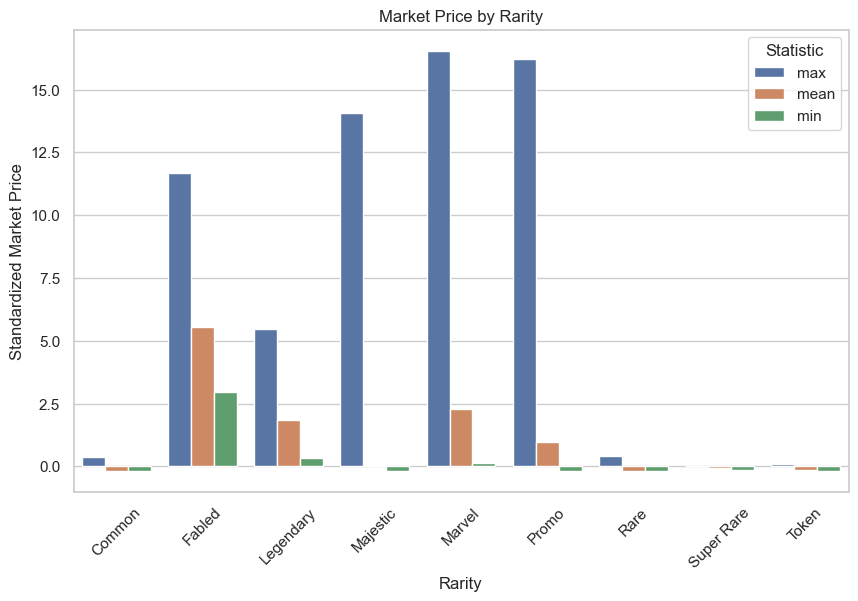

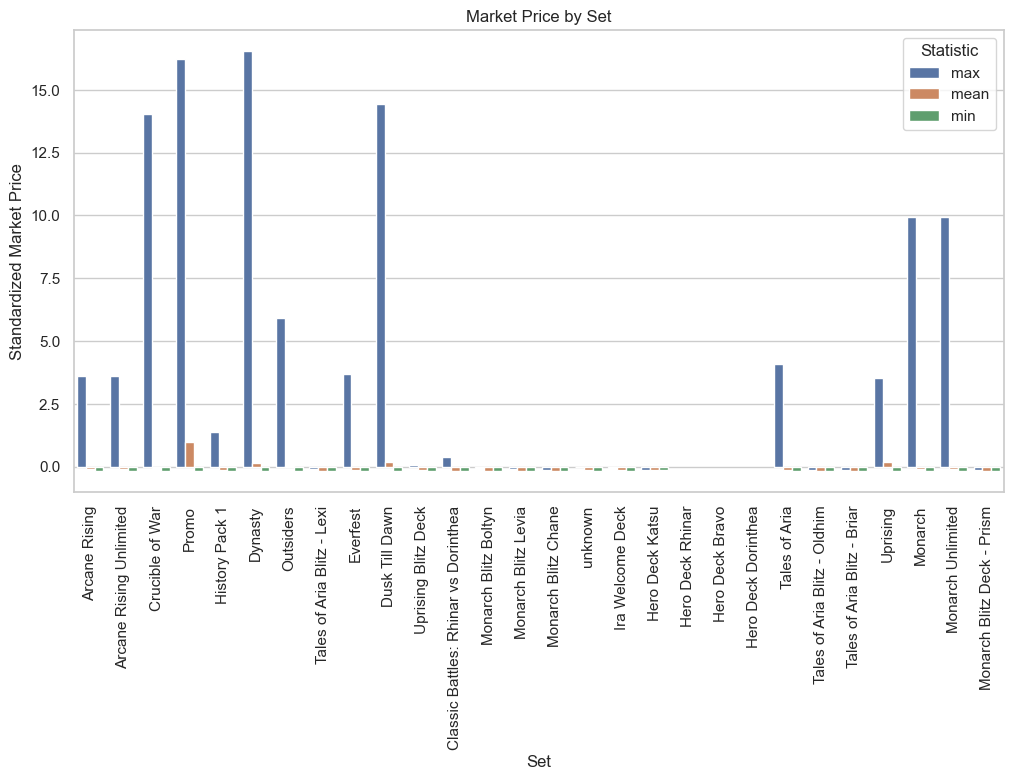

In [369]:
# create bar plot for rarity pivot table using seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x='rarity', y='price', hue='statistic', data=pivot_table_rarity_long)
plt.title('Market Price by Rarity')
plt.xlabel('Rarity')
plt.ylabel('Standardized Market Price')
plt.xticks(rotation=45)
plt.legend(title='Statistic', title_fontsize='12')
plt.show()

#create bar plot for set pivtot table using seaborn
pivot_table_set.reset_index(inplace=True)
pivot_table_set_long = pd.melt(pivot_table_set, id_vars='set', var_name='statistic', value_name='price')


plt.figure(figsize=(12, 6))
sns.barplot(x='set', y='price', hue='statistic', data=pivot_table_set_long)
plt.title('Market Price by Set')
plt.xlabel('Set')
plt.ylabel('Standardized Market Price')
plt.xticks(rotation=90)
plt.legend(title='Statistic', title_fontsize='12')
plt.show()



